# Introduction

Did you know that in the fiercely competitive telecommunication industry, a staggering 80% of customer churn happens within the first 90 days?  This means that for every 5 customers a company acquires, 4 might leave within a short period, leading to significant revenue loss.

## Problem Statement


SyriaTel, like many telecommunication companies, faces a significant challenge: customer churn. Customers who discontinue their services lead to lost revenue and increased customer acquisition costs. This hinders SyriaTel's growth and overall profitability.

### Main Objective
Develop a machine learning model to predict customer churn for SyriaTel.

### Specific Objectives
  1. Identify patterns and relationships within customer data that are indicative of churn.
  2. Identify patterns and relationships within customer data that are indicative of churn.
  3. Select the best performing model and interpret its results to understand key factors influencing churn.

## Notebook Structure
- Data Wrangling
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Conclusions
- Recommendations


## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold, validation_curve
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss




## Reading the Data

In [2]:
filename = 'bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(filename, index_col=0)
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.tail()


,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
df.shape

(3333, 20)

In [5]:
#Check for missing values
print(df.isnull().sum())

account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


The dataset contains 0 null values

In [6]:
print(df.dtypes)

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [7]:
df.columns.tolist()

['account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

## Exploratory Data Analysis

### Univariate Analysis

#### Distribution of subscribers by target attribute churn. What is the percentage of loyal subscribers?

<Axes: xlabel='churn', ylabel='count'>

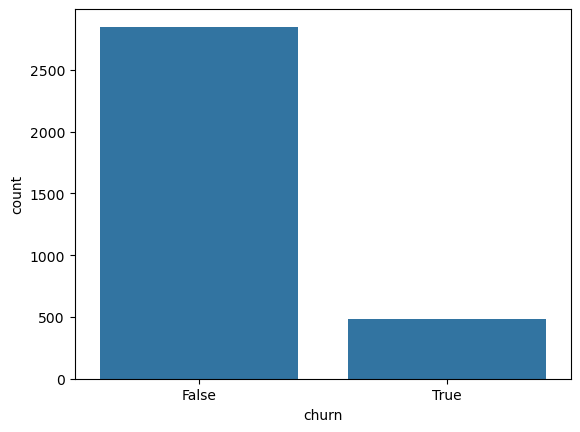

In [8]:
sns.countplot(data=df, x='churn', )

In [9]:
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

###### The above visualization shows the distribution of subscribers using the target variable Churn. It shows that SyriaTel  retain 85.5% of their total customers.

#####   State with the Highest and Lowest Number of Calls (All types of calls)

In [10]:
# State with the highest number of calls
all_calls = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls']
total_calls = df.groupby('state')[all_calls].sum().sum(axis=1).sort_values()

print('The state with the highest number of calls is :' , total_calls.idxmax() , total_calls.max())
print('The state with the lowest number of calls is :' , total_calls.idxmin() , total_calls.min())

The state with the highest number of calls is : WV 32682
The state with the lowest number of calls is : CA 10632


#### Checking if subscribers who make international calls purchase the International Call Plan

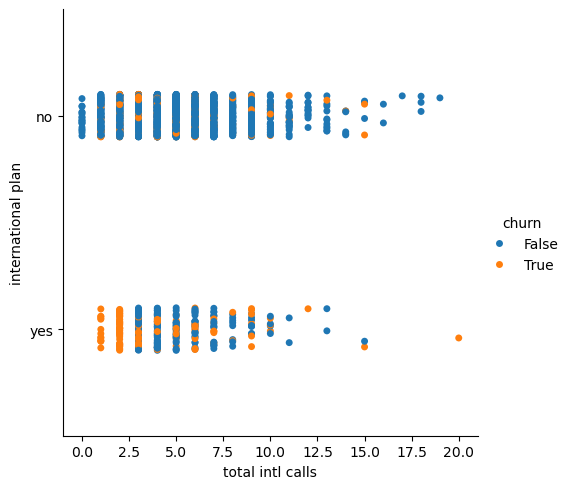

In [11]:
sns.catplot(data=df, x='total intl calls', y='international plan', hue = 'churn')

In [12]:
df.groupby('international plan')['total intl calls'].value_counts()

international plan  total intl calls
no                  3                   595
                    4                   559
                    2                   442
                    5                   439
                    6                   302
                    7                   194
                    1                   147
                    8                   106
                    9                    95
                    10                   43
                    11                   26
                    0                    18
                    12                   14
                    13                   12
                    14                    6
                    15                    5
                    18                    3
                    16                    2
                    17                    1
                    19                    1
yes                 3                    73
                    4                  

#### States with the Highest and Lowest Churn Rate

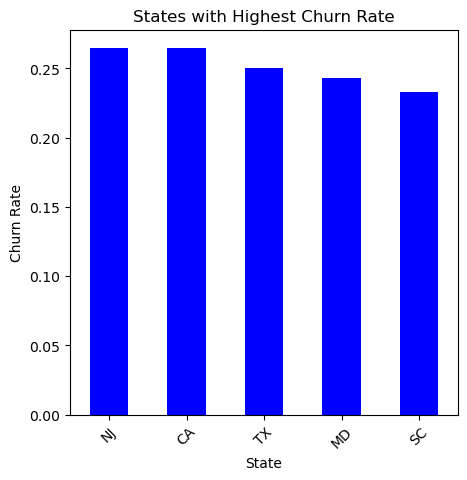

In [13]:
# Calculate the churn rate for each state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)

# Select the top states with the highest churn rate
top_states_churn = state_churn_rate.head(5)

# Visualize the states with the highest churn rate using a bar plot
plt.figure(figsize=(5, 5))
top_states_churn.plot(kind='bar', color='blue') 
plt.title('States with Highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

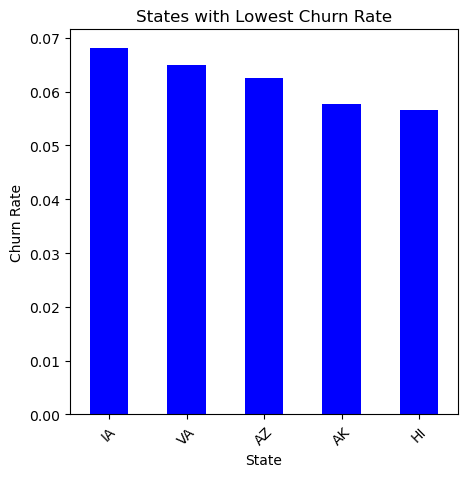

In [14]:
# Calculate the churn rate for each state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)

# Select the top states with the lowest churn rate
low_states_churn = state_churn_rate.tail(5)

# Visualize the states with the lowest churn rate using a bar plot
plt.figure(figsize=(5, 5))
low_states_churn.plot(kind='bar', color='blue') 
plt.title('States with Lowest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

#### Correlation between numerical features

In [15]:
# Get descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
description = df[numerical_cols].describe(include='all')
description

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Distrubution Plots for Numeric Features

C:\Users\kevan\AppData\Local\Temp\ipykernel_5140\670183398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["account length"],bins=20,ax=ax[0,0]);
C:\Users\kevan\AppData\Local\Temp\ipykernel_5140\670183398.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total day calls"],bins=20,ax

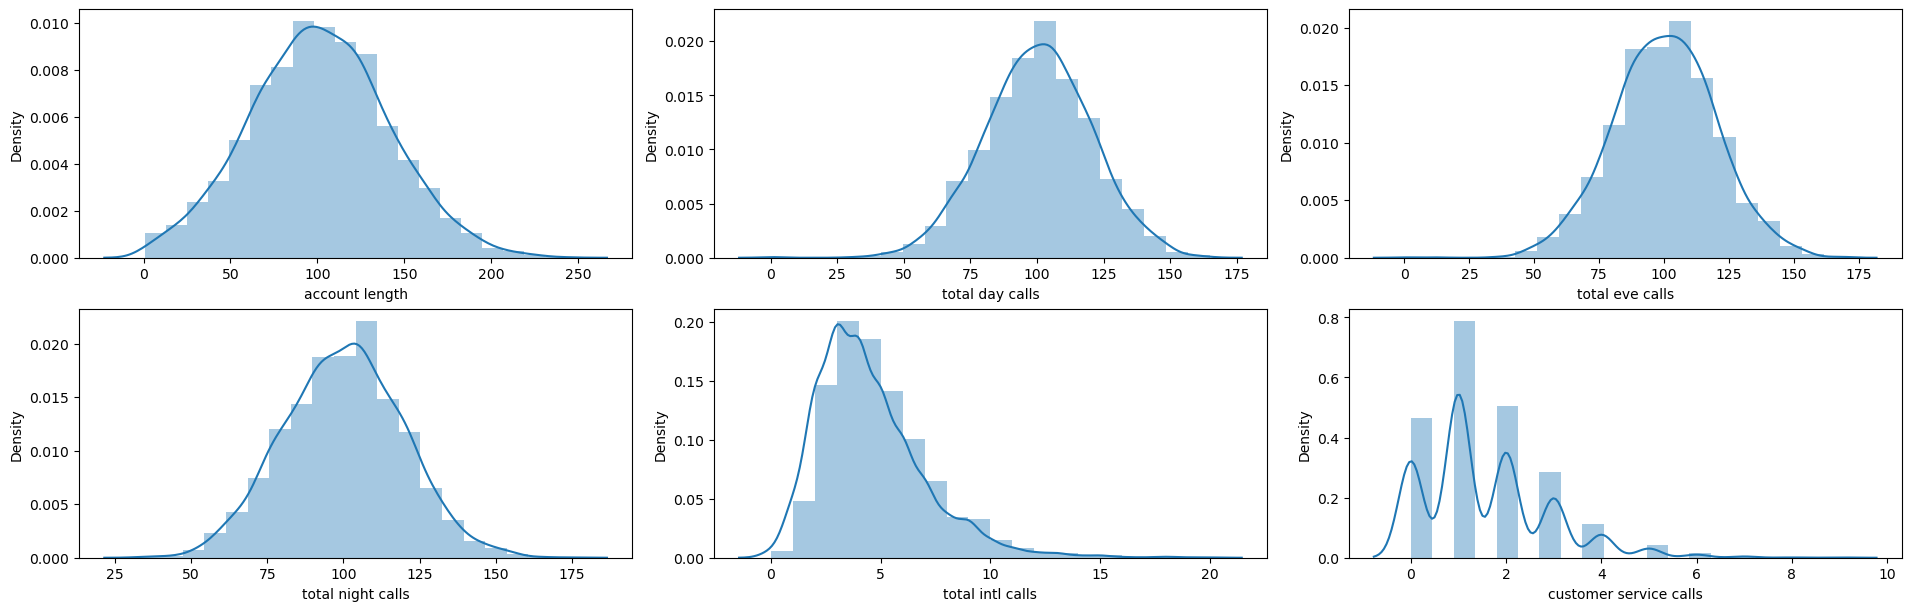

In [16]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

For the distribution plots of the features above, all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.

Customer service calls has a few peaks, which indicates there are a few modes in the population. This makes sense because customer service calls has to be a integer and not a float number.

<Axes: >

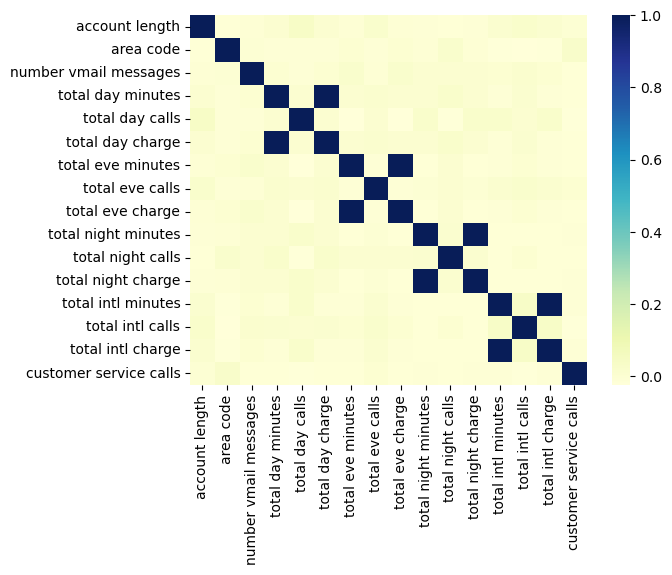

In [17]:
#Which numerical values have the highest degree of correlation
numeric_feats = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'bool')].index
sns.heatmap(df[numeric_feats].corr(), cmap="YlGnBu")

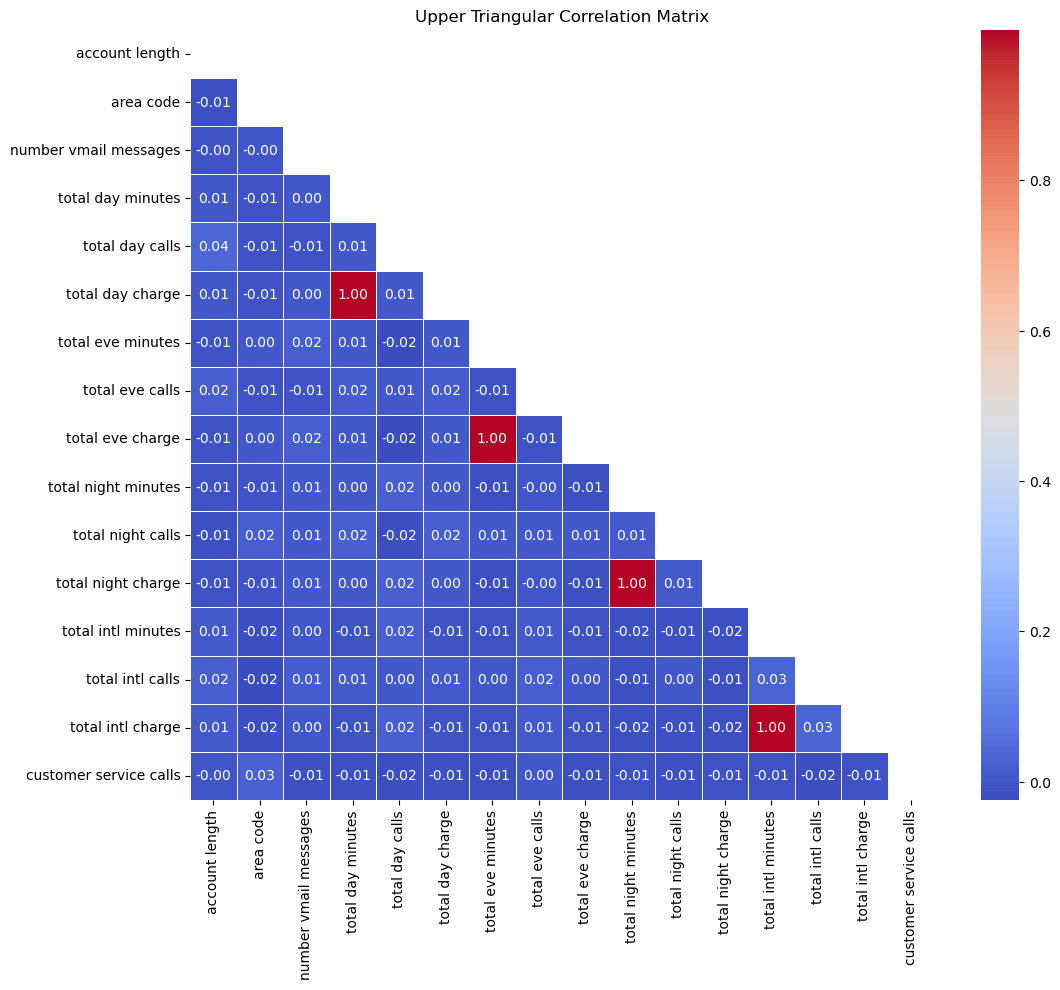

In [18]:
# Select only numeric columns for correlation analysis
numeric_df = df[numeric_feats]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap for visualization with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Upper Triangular Correlation Matrix')
plt.show()

## Correlation across the different attributes`
Correlation was performed across the different attributes. It is observed that the total minutes and total charge impacts whether a person will churn or not. Apart from that, there is not a lot of correlation between various features in the dataset.

### What other insights can be found in the available data?

Text(0.5, 0, 'Total Night Charge')

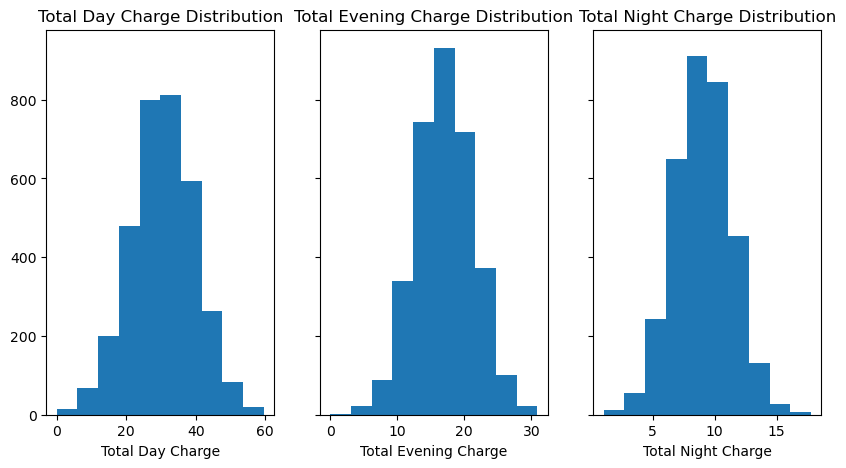

In [19]:
# Relationship Between Day, Evening and Night Charges
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
axs[0].hist(data=df, x='total day charge', label='Day Charge')
axs[1].hist(data=df, x='total eve charge', label='Evening Charge')
axs[2].hist(data=df, x='total night charge', label = 'Night Charge')

axs[0].set_title('Total Day Charge Distribution')
axs[1].set_title('Total Evening Charge Distribution')
axs[2].set_title('Total Night Charge Distribution')
axs[0].set_xlabel('Total Day Charge')
axs[1].set_xlabel('Total Evening Charge')
axs[2].set_xlabel('Total Night Charge')

In [20]:
print(stats.pointbiserialr(df['churn'], df['total day charge']))
print(stats.pointbiserialr(df['churn'], df['total eve charge']))
print(stats.pointbiserialr(df['churn'], df['total night charge']))

SignificanceResult(statistic=0.20515074317015242, pvalue=5.300605952412188e-33)
SignificanceResult(statistic=0.09278603942871307, pvalue=8.036524227776378e-08)
SignificanceResult(statistic=0.03549555624050648, pvalue=0.040451218769055254)


In [21]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']
print(stats.pointbiserialr(df['churn'], df['total charge']))

SignificanceResult(statistic=0.2269617454153734, pvalue=3.3815074744627273e-40)


Text(0.5, 1.0, 'Total Night Charge Distribution')

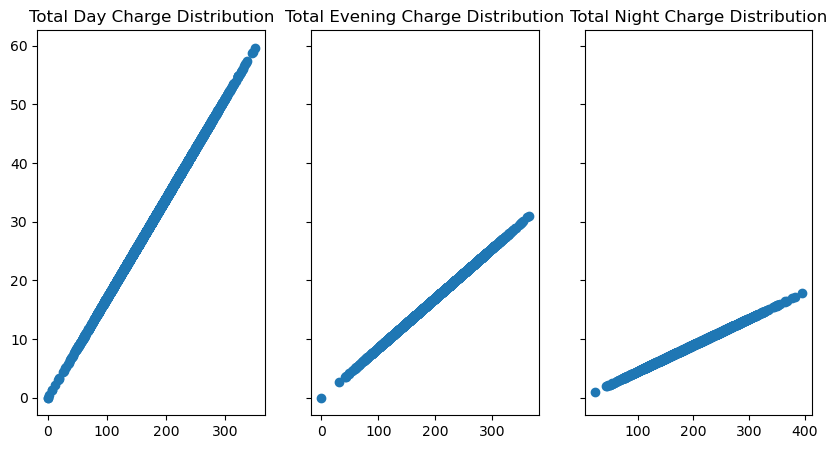

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
axs[0].scatter(data=df, x='total day minutes', y='total day charge')
axs[1].scatter(data=df, x='total eve minutes', y='total eve charge')
axs[2].scatter(data=df, x='total night minutes', y='total night charge')
axs[0].set_title('Total Day Charge Distribution')
axs[1].set_title('Total Evening Charge Distribution')
axs[2].set_title('Total Night Charge Distribution')

In [23]:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
print(stats.pointbiserialr(df['churn'], df['total minutes']))

SignificanceResult(statistic=0.19645663173626715, pvalue=2.3690787585908578e-30)


Feature Engineering

In [24]:
# Merge all call activity and charges
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']

# Drop the original features
df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
           'total eve calls', 'total night calls', 'total intl calls',
          'total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)

# check on affected changes
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,customer service calls,churn,total charge,total minutes,total charges,total calls
state,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,110,1,False,72.86,717.2,75.56,303
OH,107,415,371-7191,no,yes,26,123,1,False,55.54,625.2,59.24,332
NJ,137,415,358-1921,no,no,0,114,0,False,59.00,539.4,62.29,333
OH,84,408,375-9999,yes,no,0,71,2,False,65.02,564.8,66.80,255
OK,75,415,330-6626,yes,no,0,113,3,False,49.36,512.0,52.09,359


### Data Preprocessing
#### One Hot Encoding 
It involes converting categorical values arranged in a random order into a fromat acceptable by the machine learning algorithms to be used

In [25]:
df.shape

(3333, 13)

In [26]:
df.dtypes

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day calls             int64
customer service calls      int64
churn                        bool
total charge              float64
total minutes             float64
total charges             float64
total calls                 int64
dtype: object

In [27]:
ip, vmp = df['international plan'].map({'yes': 1, 'no': 0}), df['voice mail plan'].map({'yes': 1, 'no': 0})

df['international plan'], df['voice mail plan'] = ip, vmp
df['churn'] = df['churn'].astype('int')

df = pd.get_dummies(data=df, columns=['area code'])
df.drop(['phone number'], axis=1, inplace=True)


df.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,customer service calls,churn,total charge,total minutes,total charges,total calls,area code_408,area code_415,area code_510
state,,,,,,,,,,,,,,
KS,128,0,1,25,110,1,0,72.86,717.2,75.56,303,False,True,False
OH,107,0,1,26,123,1,0,55.54,625.2,59.24,332,False,True,False
NJ,137,0,0,0,114,0,0,59.00,539.4,62.29,333,False,True,False
OH,84,1,0,0,71,2,0,65.02,564.8,66.80,255,True,False,False
OK,75,1,0,0,113,3,0,49.36,512.0,52.09,359,False,True,False


Scaling the Data

In [28]:
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df[[column]])

# Iterate through numerical columns and scale them
for column in df.select_dtypes(include=[np.number]).columns:
    df[[column]] = scaling(column)

df.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,customer service calls,churn,total charge,total minutes,total charges,total calls,area code_408,area code_415,area code_510
state,,,,,,,,,,,,,,
KS,0.524793,0.0,1.0,0.490196,0.666667,0.111111,0.0,0.728575,0.720659,0.718793,0.497778,False,True,False
OH,0.438017,0.0,1.0,0.509804,0.745455,0.111111,0.0,0.489942,0.567505,0.495903,0.626667,False,True,False
NJ,0.561983,0.0,0.0,0.000000,0.690909,0.000000,0.0,0.537614,0.424671,0.537558,0.631111,False,True,False
OH,0.342975,1.0,0.0,0.000000,0.430303,0.222222,0.0,0.620557,0.466955,0.599153,0.284444,True,False,False
OK,0.305785,1.0,0.0,0.000000,0.684848,0.333333,0.0,0.404795,0.379058,0.398252,0.746667,False,True,False


In [29]:
target = df.pop('churn').astype(int)
target


state
KS    0
OH    0
NJ    0
OH    0
OK    0
     ..
AZ    0
WV    0
RI    0
CT    0
TN    0
Name: churn, Length: 3333, dtype: int32

#### Splitting Data

Before modeling it is important to split the data into training and test data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=12)

In [31]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#  X_train_smote and y_train_smote are the feature matrix and target variable of the oversampled training data
print("Shape of X_train_smote:", X_train_smote.shape)
print("\nValue counts of y_train_smote:\n", y_train_smote.value_counts())

Shape of X_train_smote: (4274, 13)

Value counts of y_train_smote:
 churn
0    2137
1    2137
Name: count, dtype: int64


In [32]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train, y_train)
preds = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.9448441247002398


In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

tree = DecisionTreeClassifier()
params = {'max_depth': np.arange(1, 21, 2),
         'min_samples_split': np.arange(2, 11, 2),
         'min_samples_leaf': np.arange(1, 6),
         'criterion': ['gini', 'entropy']}

tree_grid = GridSearchCV(tree, params, cv=kf, scoring='accuracy', n_jobs=-1)
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

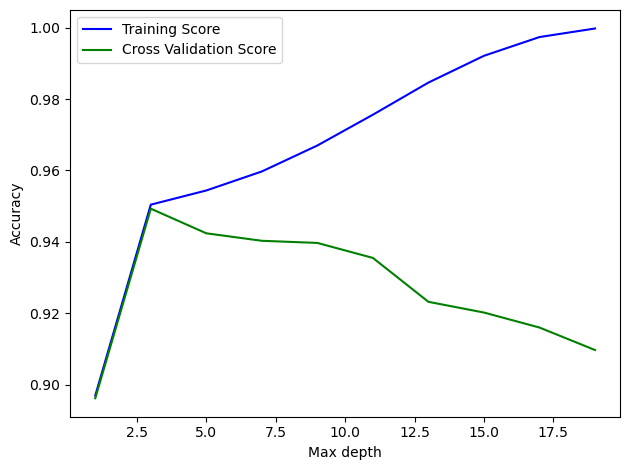

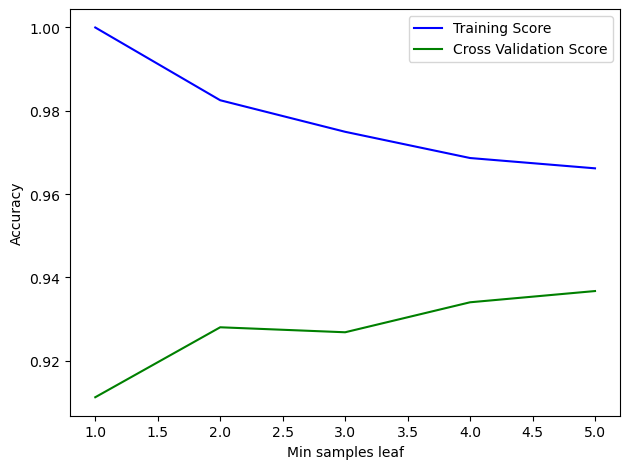

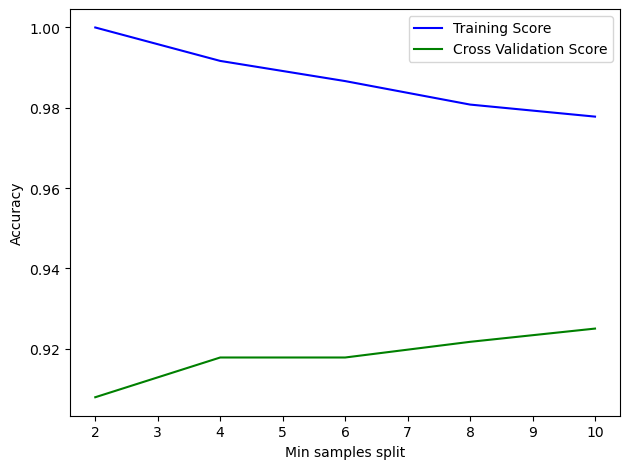

In [34]:
md_train_score, md_test_score = validation_curve(tree, df, target,
                                           param_name = 'max_depth',
                                           param_range = params['max_depth'], cv = 5, scoring = 'accuracy')
msl_train_score, msl_test_score = validation_curve(tree, df, target,
                                           param_name = 'min_samples_leaf',
                                           param_range = params['min_samples_leaf'], cv = 5, scoring = 'accuracy')
mss_train_score, mss_test_score = validation_curve(tree, df, target,
                                           param_name = 'min_samples_split',
                                           param_range = params['min_samples_split'], cv = 5, scoring = 'accuracy')

md_train_score, md_test_score = np.mean(md_train_score, axis=1), np.mean(md_test_score, axis=1)
msl_train_score, msl_test_score = np.mean(msl_train_score, axis=1), np.mean(msl_test_score, axis=1)
mss_train_score, mss_test_score = np.mean(mss_train_score, axis=1), np.mean(mss_test_score, axis=1)
 
plt.plot(params['max_depth'], md_train_score, label = 'Training Score', color = 'b')
plt.plot(params['max_depth'], md_test_score, label = 'Cross Validation Score', color = 'g')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

plt.plot(params['min_samples_leaf'], msl_train_score, label = 'Training Score', color = 'b')
plt.plot(params['min_samples_leaf'], msl_test_score, label = 'Cross Validation Score', color = 'g')
plt.xlabel('Min samples leaf')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

plt.plot(params['min_samples_split'], mss_train_score, label = 'Training Score', color = 'b')
plt.plot(params['min_samples_split'], mss_test_score, label = 'Cross Validation Score', color = 'g')
plt.xlabel('Min samples split')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [35]:
best_tree = tree_grid.best_estimator_
preds = best_tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))
print('Precision:', precision_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))
print('F1:', f1_score(y_test, preds))

Accuracy: 0.9484412470023981
Precision: 0.9333333333333333
Recall: 0.6942148760330579
F1: 0.7962085308056872


<Axes: xlabel='None', ylabel='None'>

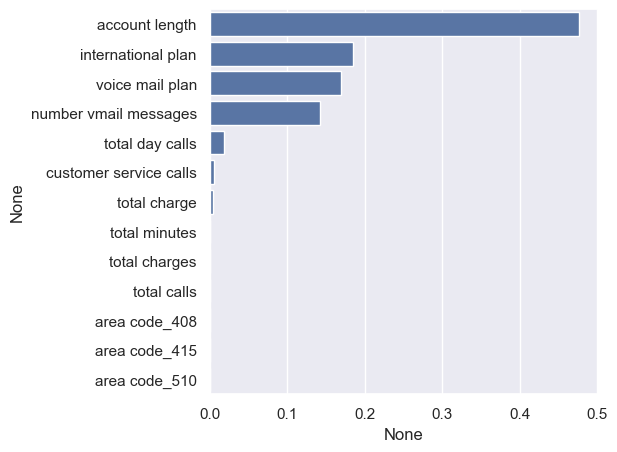

In [57]:
sns.set(rc={'figure.figsize':(5,5)});

tree_feature_importances = pd.Series(best_tree.feature_importances_, index=df.columns).sort_values(ascending=False)
sns.barplot(x=tree_feature_importances, y=tree_feature_importances.index)

In [37]:
tree = DecisionTreeClassifier() 
params = {'max_depth': np.arange(1, 11, 2),
         'min_samples_split': np.arange(2, 11, 2),
         'min_samples_leaf': np.arange(1, 6),
         'max_features': np.arange(15, 22),
         'criterion': ['gini', 'entropy']}

tree_grid = GridSearchCV(tree, params, cv=kf, scoring='accuracy', n_jobs=-1)
tree_grid.fit(X_train[tree_feature_importances.index[:21]], y_train)
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [38]:
best_tree = tree_grid.best_estimator_
preds = best_tree.predict(X_test[tree_feature_importances.index[:21]])
print('Accuracy:', accuracy_score(y_test, preds))
print('Precision:', precision_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))
print('F1:', f1_score(y_test, preds))

Accuracy: 0.9484412470023981
Precision: 0.9333333333333333
Recall: 0.6942148760330579
F1: 0.7962085308056872


In [39]:
export_graphviz(best_tree, out_file='tree.dot', feature_names=df[tree_feature_importances.index[:21]].columns)
print(open('tree.dot').read())

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="total charges <= 0.698\nentropy = 0.597\nsamples = 2499\nvalue = [2137, 362]"] ;
1 [label="customer service calls <= 0.389\nentropy = 0.444\nsamples = 2299\nvalue = [2087, 212]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="international plan <= 0.5\nentropy = 0.313\nsamples = 2124\nvalue = [2004, 120]"] ;
1 -> 2 ;
3 [label="total minutes <= 0.272\nentropy = 0.179\nsamples = 1931\nvalue = [1879, 52]"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 121\nvalue = [121, 0]"] ;
3 -> 4 ;
5 [label="total minutes <= 0.302\nentropy = 0.188\nsamples = 1810\nvalue = [1758, 52]"] ;
3 -> 5 ;
6 [label="entropy = 0.491\nsamples = 56\nvalue = [50, 6]"] ;
5 -> 6 ;
7 [label="entropy = 0.175\nsamples = 1754\nvalue = [1708, 46]"] ;
5 -> 7 ;
8 [label="total minutes <= 0.71\nentropy = 0.936\nsamples = 193\nvalue = [125, 68]"] ;
2 -> 8 ;
9 [label="total minutes <= 0.686\nentropy = 0.925

KNN 

In [40]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.8980815347721822


In [41]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

print('Array of metric values:', scores)
print('Mean metric on cross-validation:', np.mean(scores))

Array of metric values: [0.914     0.892     0.886     0.87      0.8757515]
Mean metric on cross-validation: 0.8875503006012024


In [42]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 50, 2),
         'p': np.arange(1, 5),
         'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [43]:
best_knn = knn_grid.best_estimator_
preds = best_knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.9028776978417267


In [44]:
rn = RadiusNeighborsClassifier(radius=10)
rn.fit(X_train, y_train)
preds = rn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

scores = cross_val_score(rn, X_train, y_train, cv=kf, scoring='accuracy')

print('Array of metric values:', scores)
print('Mean metric on cross-validation:', np.mean(scores))

Accuracy: 0.854916067146283
Array of metric values: [0.868      0.85       0.866      0.844      0.84769539]
Mean metric on cross-validation: 0.8551390781563126


In [45]:
rn = RadiusNeighborsClassifier()
params = {'radius': np.arange(8, 30, 2),
         'weights': ['uniform', 'distance']}

rn_grid = GridSearchCV(rn, params, cv=5, scoring='accuracy', n_jobs=-1)
rn_grid.fit(X_train, y_train)
rn_grid.best_params_

{'radius': 8, 'weights': 'uniform'}

In [46]:
best_rn = rn_grid.best_estimator_
preds = best_rn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.854916067146283


In [47]:
nc = NearestCentroid()
params = {'shrink_threshold': np.arange(8, 30, 2),
         'metric': ['euclidean', 'manhattan']}

nc_grid = GridSearchCV(nc, params, cv=5, scoring='accuracy', n_jobs=-1)
nc_grid.fit(X_train, y_train)
nc_grid.best_params_

{'metric': 'euclidean', 'shrink_threshold': 10}

In [48]:
best_nc = nc_grid.best_estimator_
preds = best_nc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.854916067146283


In [49]:
preds = best_knn.predict(X_test)
print('Precision:', precision_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))
print('F1:', f1_score(y_test, preds))

Precision: 0.717391304347826
Recall: 0.5454545454545454
F1: 0.6197183098591549


In [50]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 50, 2),
         'p': np.arange(1, 6),
         'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn, params, cv=5, scoring='recall', n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [51]:
best_knn = knn_grid.best_estimator_
preds = best_knn.predict(X_test)
print('Precision:', precision_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))
print('F1:', f1_score(y_test, preds))

Precision: 0.6206896551724138
Recall: 0.5950413223140496
F1: 0.6075949367088608


In [52]:


X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_test)

nm1 = NearMiss(version=1)
X_train_resampled, y_train_resampled = nm1.fit_resample(X_train, y_train)

In [53]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 50, 2),
         'p': np.arange(1, 6),
         'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn, params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train_resampled, y_train_resampled)
knn_grid.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [54]:
best_knn = knn_grid.best_estimator_
preds = best_knn.predict(X_test)
print('Precision:', precision_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))
print('F1:', f1_score(y_test, preds))
print('Accuracy:', accuracy_score(y_test, preds))

Precision: 0.0
Recall: 0.0
F1: 0.0
Accuracy: 0.8537170263788969


c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### XG BOOST


In [55]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nXGBoost Model Accuracy:", accuracy_xgb)
print("XGBoost Model Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Cross-validate the model to get more robust estimates of performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())




XGBoost Model Accuracy: 0.854916067146283
XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       713
           1       0.00      0.00      0.00       121

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.73      0.85      0.79       834



c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Cross-Validation Accuracy Scores: [0.936      0.94       0.954      0.932      0.93386774]
Mean CV Accuracy: 0.9391735470941883


## Conclusion
- The column total_charge has the highest correlation with customer churn since it has proved to be crucial during the training and testing of the models


## Recommendation(s)
1. Pricing and Contract Flexibility: If pricing is a major churn factor, consider offering more flexible plans, introductory discounts, or tiered pricing options to cater to different customer needs and budgets.
2. Targeted Promotions and Discounts: Use the model to identify customer segments at risk of churning and offer them targeted discounts, loyalty programs, or bundled packages that address their specific needs and usage patterns.
3. Improved Customer Service: Analyze customer service interactions within the data to identify areas for improvement. Train customer service representatives to address churn-related concerns effectively and offer personalized solutions.
    